In [1]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from time import time
from matplotlib import pyplot

In /home/arvind/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/arvind/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/arvind/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/arvind/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/arvind/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
data = read_csv('train.csv')
dataset = data.values

X = dataset[:,0:94]
y = dataset[:,94]

In [3]:
label_encoded_y = LabelEncoder().fit_transform(y)

In [4]:
results = []
num_threads=[1,2,3,4]

In [5]:
for n in num_threads:
    start = time()
    model = XGBClassifier(nthread=n)
    model.fit(X, label_encoded_y)
    elapsed = time() - start
    print(n, elapsed)
    results.append(elapsed)

1 57.833881855010986
2 29.317721605300903
3 28.990028381347656
4 28.127631902694702


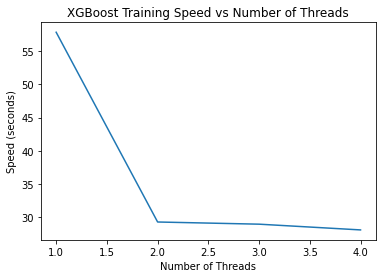

In [6]:
pyplot.plot(num_threads, results)
pyplot.ylabel('Speed (seconds)')
pyplot.xlabel('Number of Threads')
pyplot.title('XGBoost Training Speed vs Number of Threads')
pyplot.show()

In [8]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import time

In [9]:
data = read_csv('train.csv')
dataset = data.values

In [10]:
X = dataset[:,0:94]
y = dataset[:,94]

In [11]:
label_encoded_y = LabelEncoder().fit_transform(y)

In [12]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

In [13]:
start = time.time()
model = XGBClassifier(nthread=1)

In [14]:
results = cross_val_score(model,X,label_encoded_y,cv=kfold,scoring='neg_log_loss',n_jobs=-1)
elapsed = time.time() - start

In [15]:
print("Single Thread XGBoost, Parallel Thread CV: %f" % (elapsed))

Single Thread XGBoost, Parallel Thread CV: 322.612845


In [16]:
start = time.time()
model = XGBClassifier(nthread=-1)
results = cross_val_score(model, X, label_encoded_y, cv=kfold, scoring='neg_log_loss',n_jobs=1)
elapsed = time.time() - start

In [17]:
print("Parallel Thread XGBoost, Single Thread CV: %f" %(elapsed))

Parallel Thread XGBoost, Single Thread CV: 517.614977


In [18]:
start = time.time()
model = XGBClassifier(nthread=-1)
results = cross_val_score(model, X, label_encoded_y, cv=kfold, scoring='neg_log_loss',
                         n_jobs=-1)

In [19]:
elapsed = time.time() - start

In [20]:
print("Parallel Thread XGBoost and CV: %f" %(elapsed))

Parallel Thread XGBoost and CV: 314.427559
